# Project Foundations for Data Science: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final report.

### Let us start by importing the required libraries

In [1]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# Read the data
df = pd.read_csv('foodhub_order.csv')
# Returns the first 5 rows
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Check the shape of the dataset
df.shape # Fill in the blank

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [5]:
# Checking for missing values in the data
df.isnull().sum() # Write the appropriate function to print the sum of null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Get the summary statistics of the numerical data
df.describe()  # Write the appropriate function to print the statistical summary of the data (Hint: you have seen this in the case studies before)

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
df['rating'].value_counts() # Complete the code 

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [8]:
# check unique order ID
df['order_id'].nunique()  

1898

#### Customer ID

In [9]:
# check unique customer ID
df['customer_id'].nunique()  # Complete the code to find out the number of unique Customer ID

1200

#### Restaurant name

In [10]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  # Complete the code to find out number of unique Restaurant Name

178

#### Cuisine type

In [51]:
# Check unique cuisine type
df['cuisine_type'].nunique()  # Complete the code to find out the number of unique cuisine type

14

In [52]:
# Check unique cuisine type
df['cuisine_type'].dtype # Complete the code to find out the number of unique cuisine type

dtype('O')

<AxesSubplot: xlabel='cuisine_type', ylabel='count'>

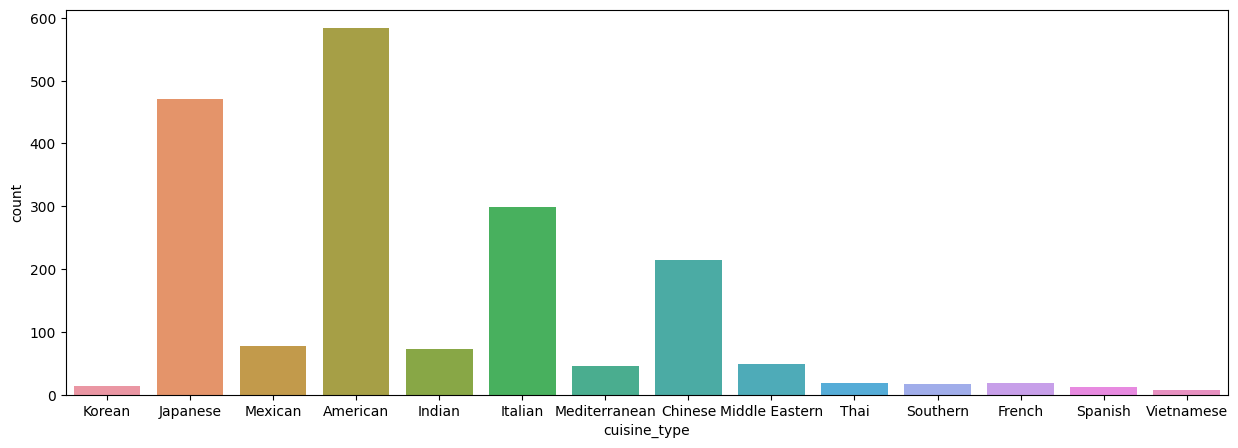

In [12]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') # Create a countplot for cuisine type

#### Cost of the order

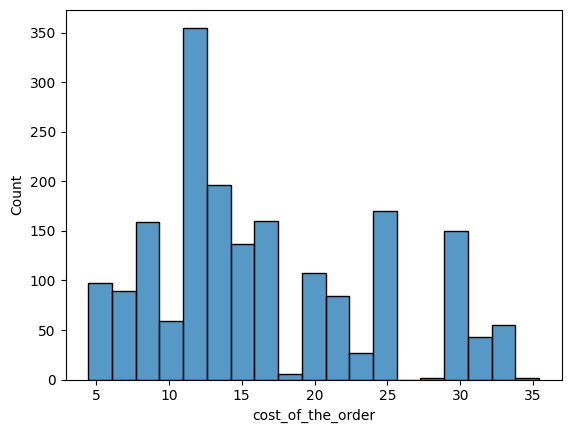

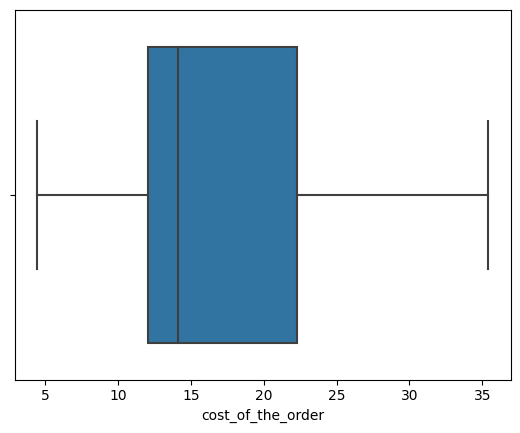

In [13]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show() 

In [14]:
median_value = df['cost_of_the_order'].median()
median_value

14.14

Quartile Values:
Q1: 12.08
Q2 (Median): 14.14
Q3: 22.2975
25th Percentile: 12.08
75th Percentile: 22.2975
Minimum: 4.47
Maximum: 35.41


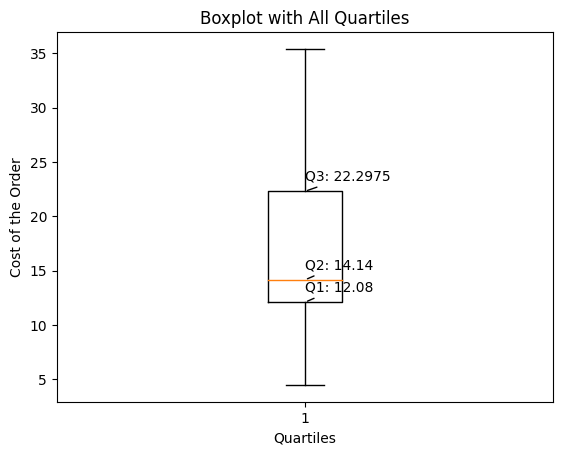

In [14]:
df = pd.read_csv('foodhub_order.csv')
import pandas as pd
import matplotlib.pyplot as plt


# Extract the column containing the data for the boxplot
data_column = 'cost_of_the_order'
data = df[data_column].tolist()

# Calculate quartiles and percentiles
quartiles = [np.percentile(data, 25), np.percentile(data, 50), np.percentile(data, 75)]
percentile_25 = np.percentile(data, 25)
percentile_75 = np.percentile(data, 75)
minimum = min(data)
maximum = max(data)

print("Quartile Values:")
print("Q1:", quartiles[0])
print("Q2 (Median):", quartiles[1])
print("Q3:", quartiles[2])
print("25th Percentile:", percentile_25)
print("75th Percentile:", percentile_75)
print("Minimum:", minimum)
print("Maximum:", maximum)

# Create a figure and axis
fig, ax = plt.subplots()

# Create the boxplot
boxplot = ax.boxplot(data)

# Add annotations for each quartile
for i, quartile in enumerate(quartiles):
    # Calculate the position for the annotation
    x_pos = 1
    y_pos = quartile
    
    # Add the annotation
    ax.annotate(f'Q{i+1}: {y_pos}', xy=(x_pos, y_pos), xytext=(x_pos, y_pos + 1),
                arrowprops=dict(facecolor='black', arrowstyle='-'))

# Set labels and title
ax.set_xlabel('Quartiles')
ax.set_ylabel('Cost of the Order')
ax.set_title('Boxplot with All Quartiles')

# Show the plot
plt.show()




#### Day of the week

In [15]:
# # Check the unique values
df['day_of_the_week'].unique() # Complete the code to check unique values for the 'day_of_the_week' column

array(['Weekend', 'Weekday'], dtype=object)

<AxesSubplot: xlabel='day_of_the_week', ylabel='count'>

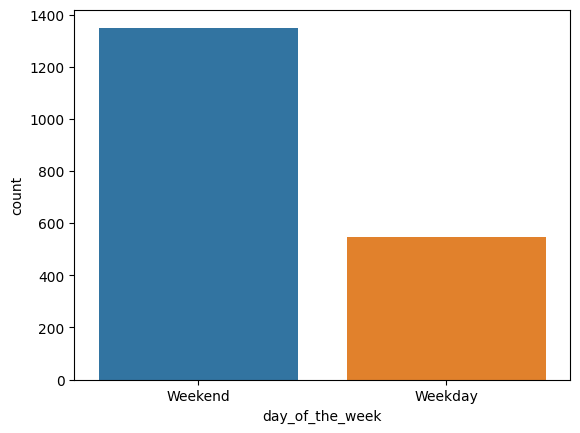

In [16]:
sns.countplot(data = df, x = 'day_of_the_week') # Complete the code to plot a bar graph for 'day_of_the_week' column

#### Rating

In [17]:
# Check the unique values
df['rating'].unique()  # Complete the code to check unique values for the 'rating' column

array(['Not given', '5', '3', '4'], dtype=object)

<AxesSubplot: xlabel='rating', ylabel='count'>

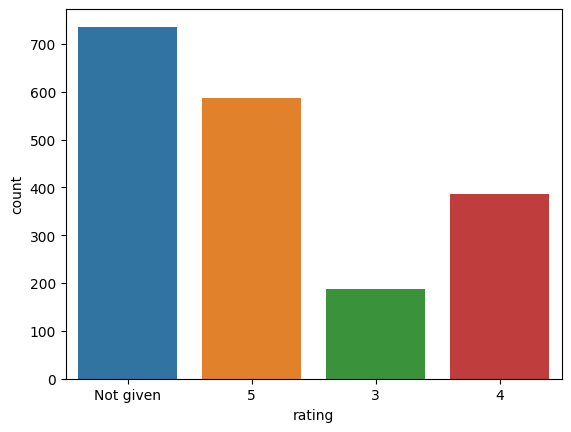

In [18]:
sns.countplot(data = df, x = 'rating') # Complete the code to plot bar graph for 'rating' column

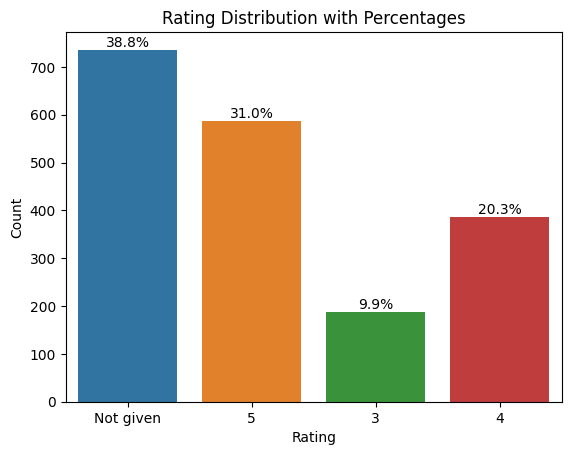

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('foodhub_order.csv')


# Create the countplot
ax = sns.countplot(data=df, x='rating')

# Calculate the percentage for each category
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Rating Distribution with Percentages')

# Show the plot
plt.show()


#### Food Preparation time

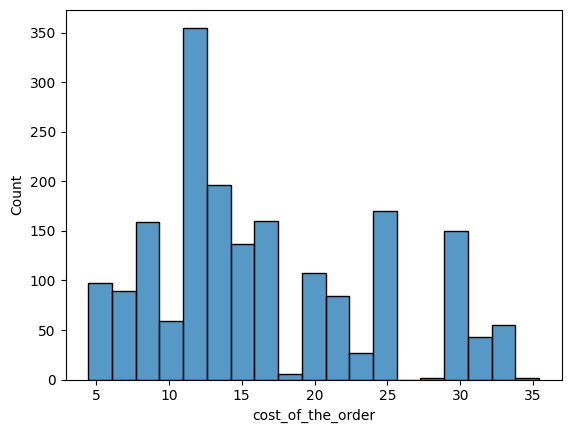

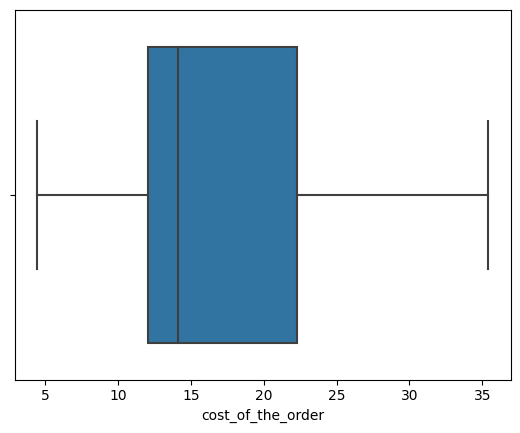

In [19]:
sns.histplot(data=df,x='cost_of_the_order') # Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') # Complete the code to plot the boxplot for the cost of order
plt.show()

#### Delivery time

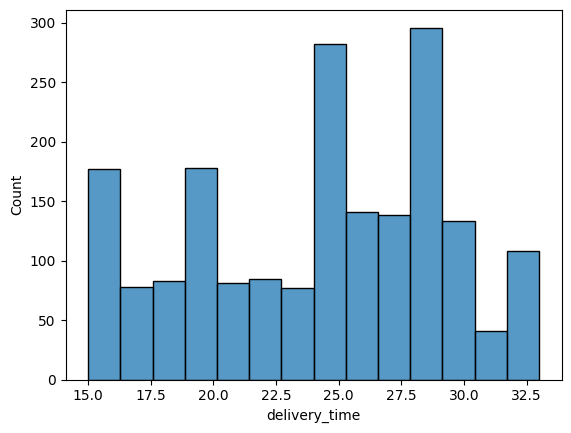

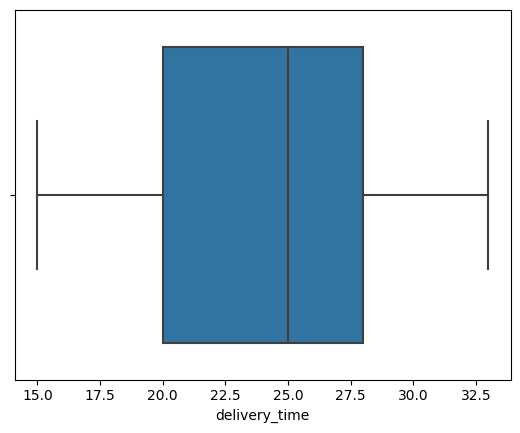

In [20]:
sns.histplot(data=df,x='delivery_time') # Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time')  # Complete the code to plot the boxplot for the delivery time
plt.show()

Quartile Values:
Q1: 20.0
Q2 (Median): 25.0
Q3: 28.0
25th Percentile: 20.0
75th Percentile: 28.0
Minimum: 15
Maximum: 33


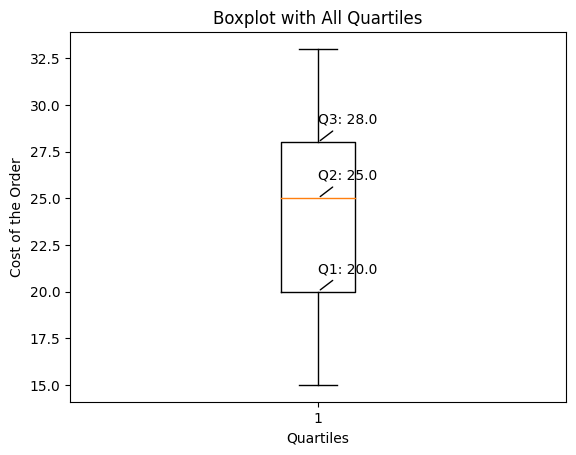

In [16]:
df = pd.read_csv('foodhub_order.csv')
import pandas as pd
import matplotlib.pyplot as plt


# Extract the column containing the data for the boxplot
data_column = 'delivery_time'
data = df[data_column].tolist()

# Calculate quartiles and percentiles
quartiles = [np.percentile(data, 25), np.percentile(data, 50), np.percentile(data, 75)]
percentile_25 = np.percentile(data, 25)
percentile_75 = np.percentile(data, 75)
minimum = min(data)
maximum = max(data)

print("Quartile Values:")
print("Q1:", quartiles[0])
print("Q2 (Median):", quartiles[1])
print("Q3:", quartiles[2])
print("25th Percentile:", percentile_25)
print("75th Percentile:", percentile_75)
print("Minimum:", minimum)
print("Maximum:", maximum)

# Create a figure and axis
fig, ax = plt.subplots()

# Create the boxplot
boxplot = ax.boxplot(data)

# Add annotations for each quartile
for i, quartile in enumerate(quartiles):
    # Calculate the position for the annotation
    x_pos = 1
    y_pos = quartile
    
    # Add the annotation
    ax.annotate(f'Q{i+1}: {y_pos}', xy=(x_pos, y_pos), xytext=(x_pos, y_pos + 1),
                arrowprops=dict(facecolor='black', arrowstyle='-'))

# Set labels and title
ax.set_xlabel('Quartiles')
ax.set_ylabel('Cost of the Order')
ax.set_title('Boxplot with All Quartiles')

# Show the plot
plt.show()




In [21]:
median_value = df['delivery_time'].median()
median_value

25.0

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [22]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5) # Complete the code

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [23]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head(1) # Complete the code to check unique values for the cuisine type on weekend

American    415
Name: cuisine_type, dtype: int64

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]

In [24]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] # Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time? [1 mark]

In [25]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  # Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [26]:
# Get the counts of each customer_id
df['customer_id'].value_counts().head(5)  # Write the appropriate column name to get the 5 most frequent customers

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

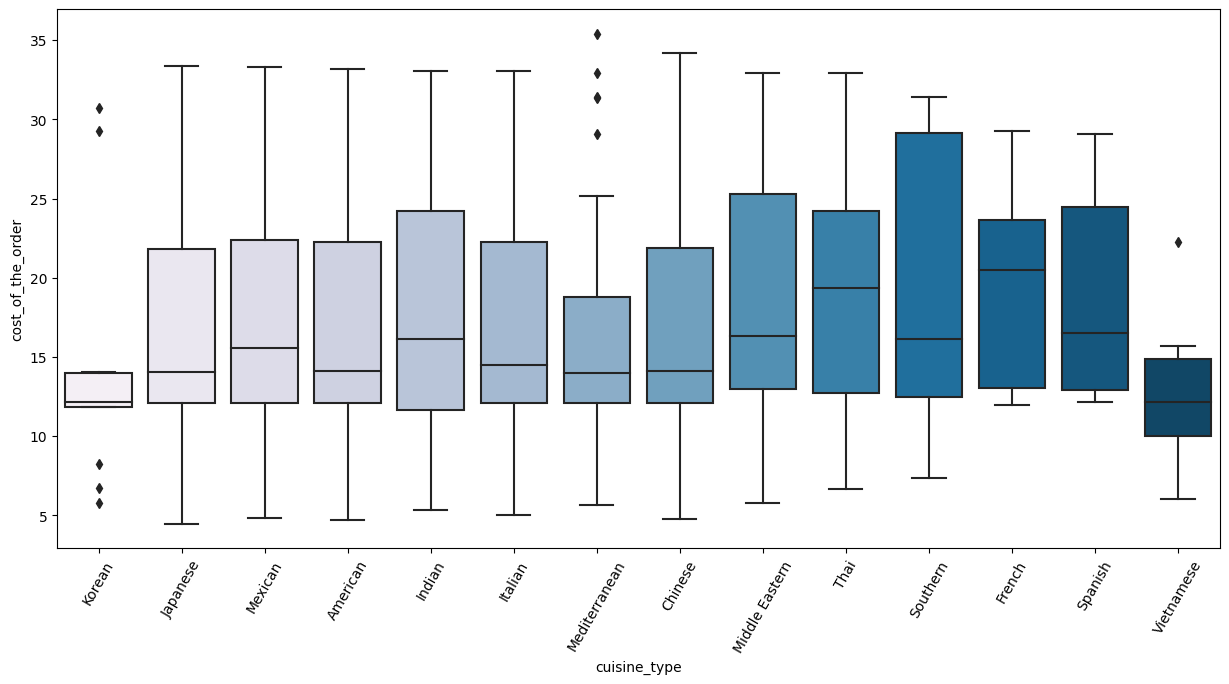

In [27]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

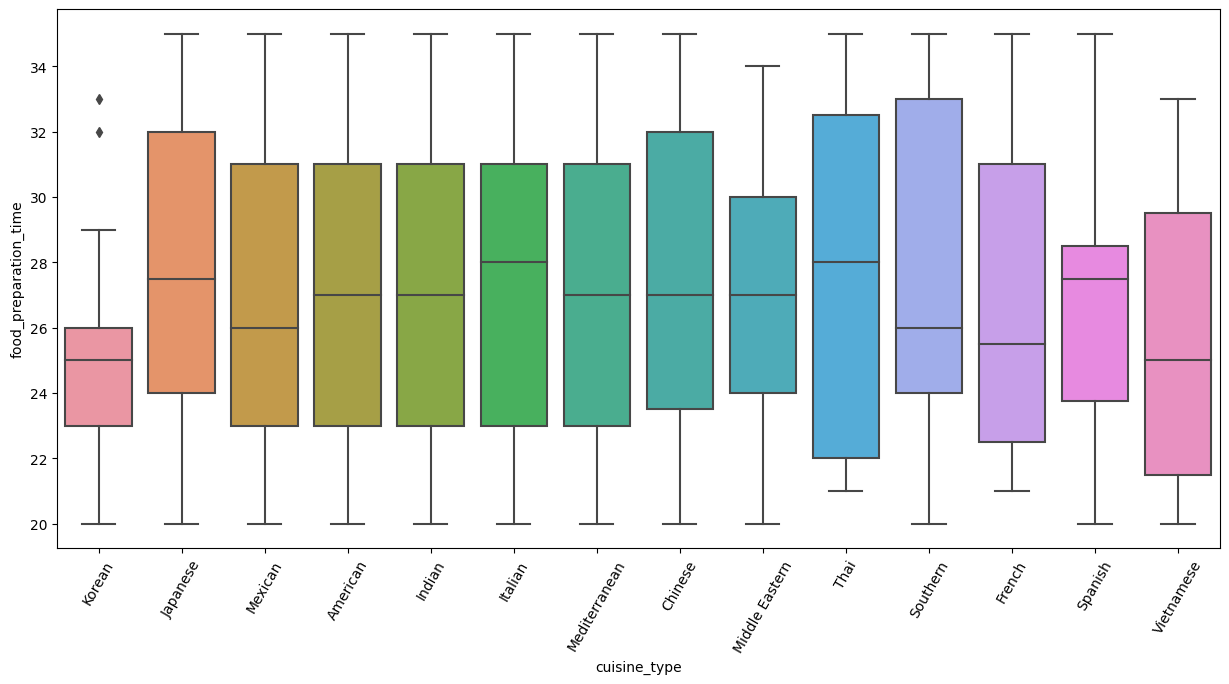

In [28]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)  # Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

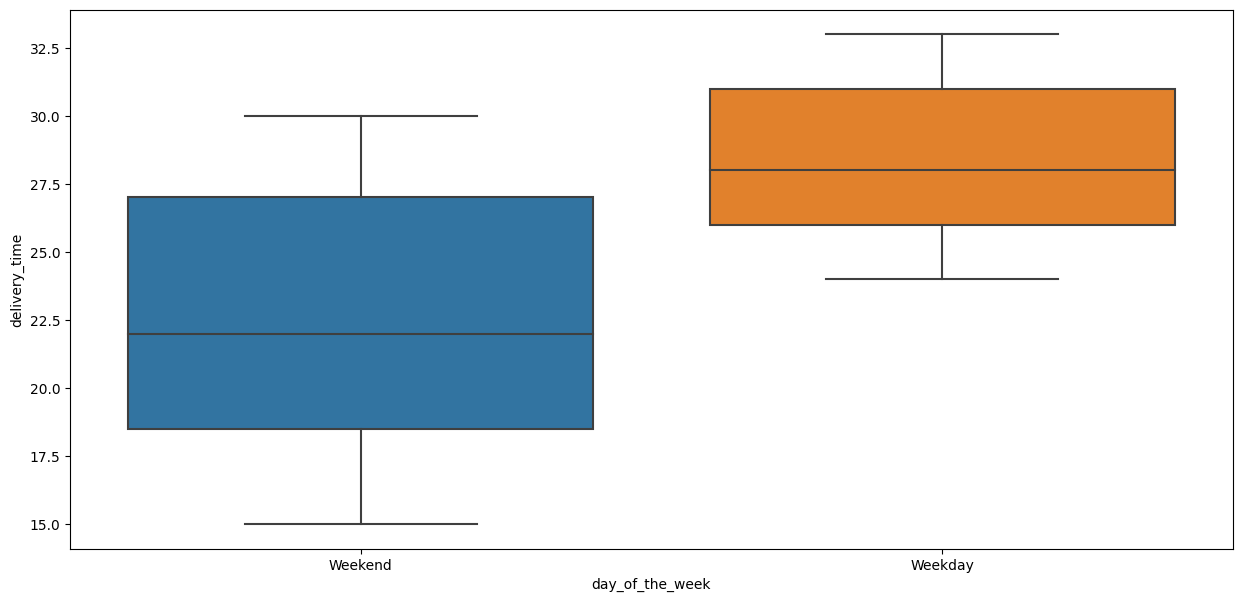

In [29]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)  # Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [30]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Rating vs Delivery time

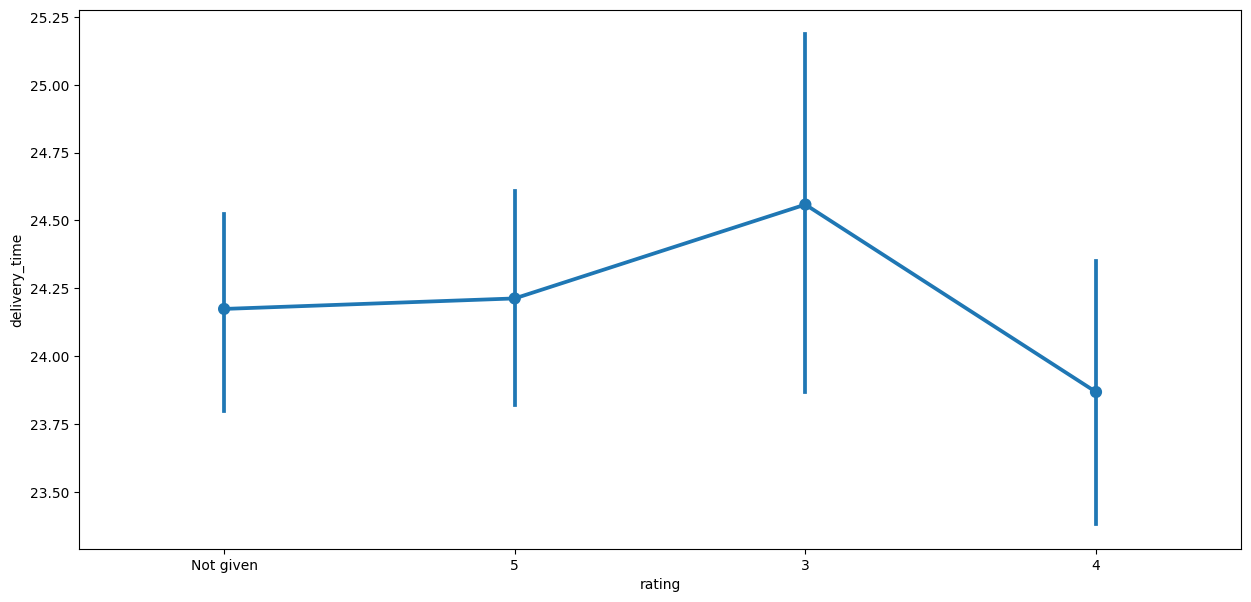

In [31]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs Food preparation time

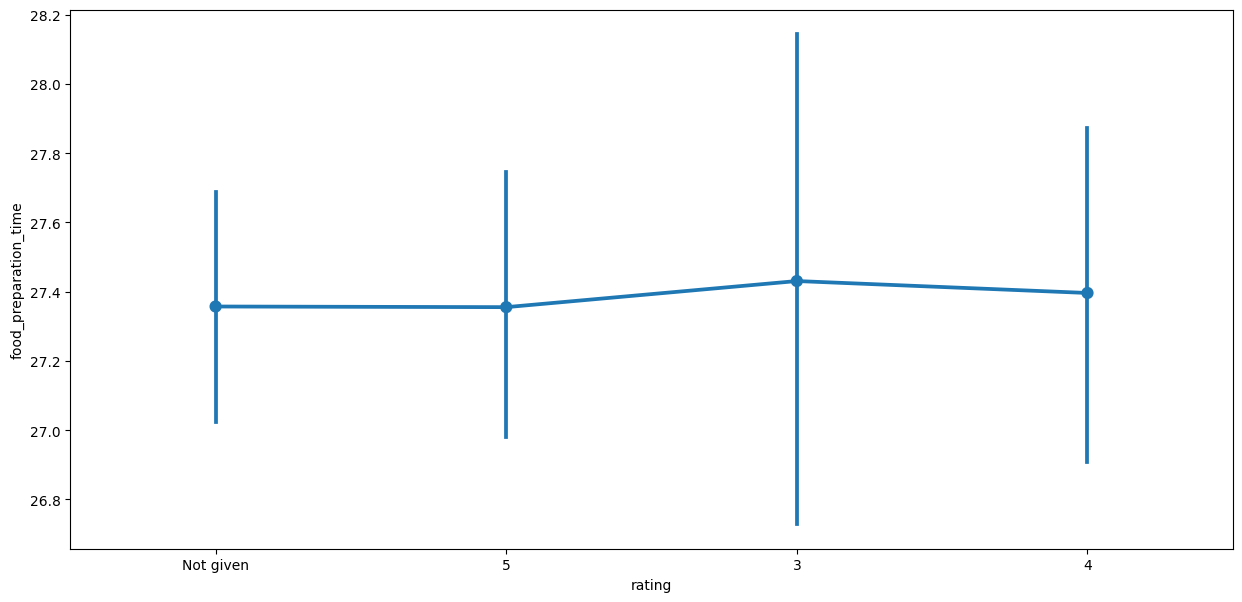

In [32]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  # Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Rating vs Cost of the order

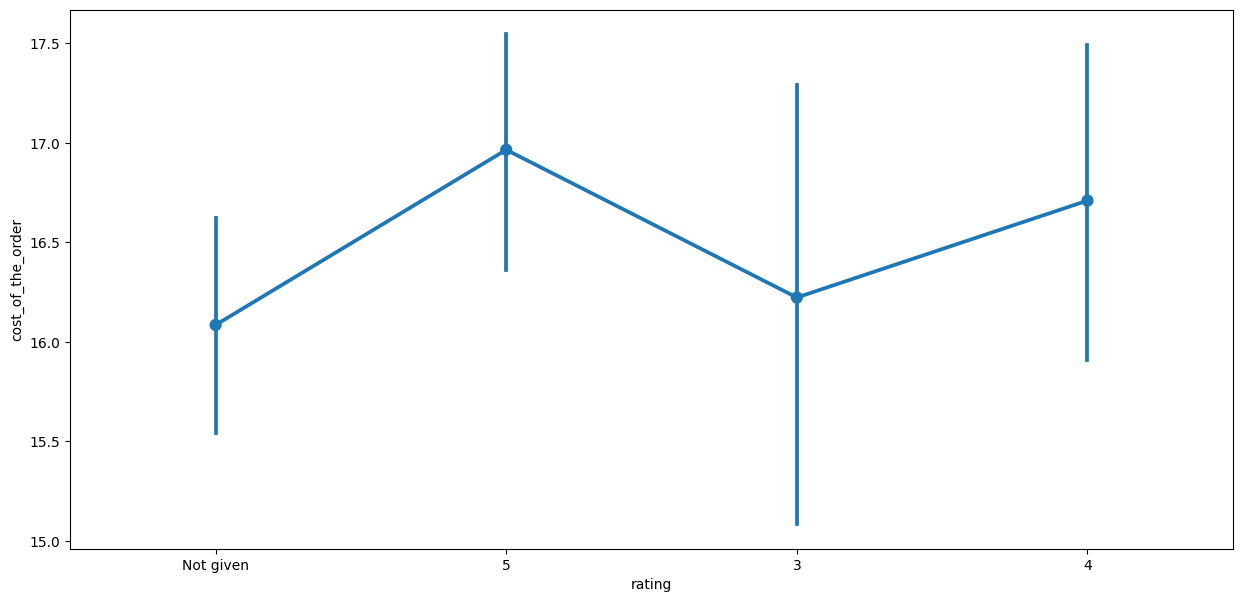

In [33]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='cost_of_the_order', data=df)   # Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Correlation among variables

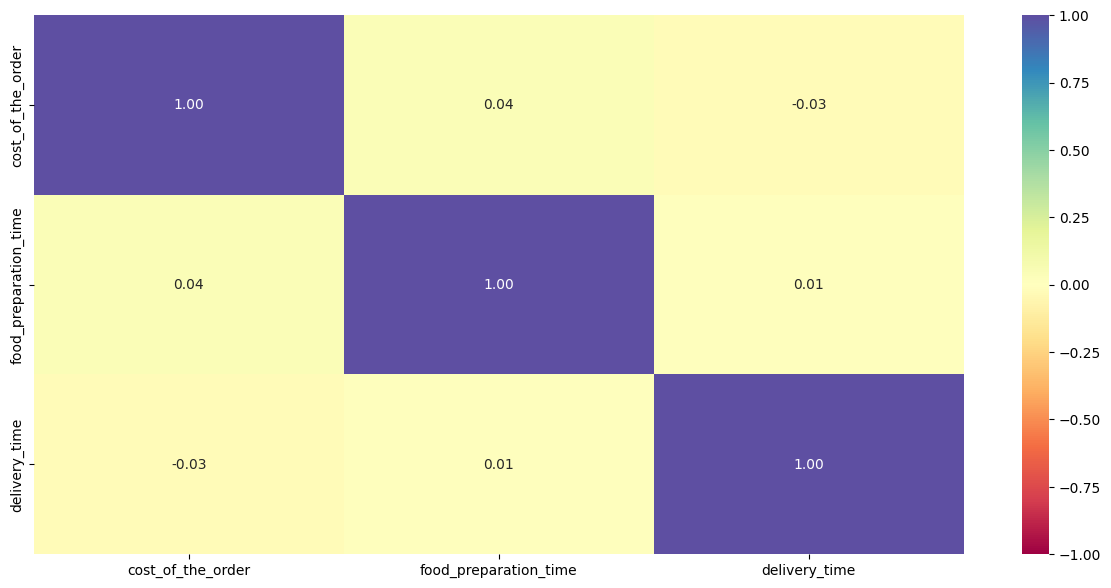

In [34]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [35]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [36]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] # Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna() # Complete the code to find the mean rating


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [37]:
# Function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) # Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [38]:
# Get the total revenue and print it
total_rev = df['Revenue'].sum() # Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]


In [39]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


# Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

# Calculate the percentage of orders that have more than 60 minutes of total delivery time
percentage = (df[df['total_time'] > 60].shape[0] / df.shape[0]) * 100

# Print the percentage
print('Percentage of orders that take more than 60 minutes to deliver:', round(percentage, 2), '%')



Percentage of orders that take more than 60 minutes to deliver: 10.54 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [40]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# Write the code below to get the mean delivery time on weekends and print it

print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
      'minutes')




The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


In [41]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'Revenue', 'total_time'],
      dtype='object')

In [42]:
df.shape

(1898, 11)

In [43]:
dfnew=df.drop(df[df['rating'] == 'Not given'].index)  #optional

In [44]:
df.shape

(1898, 11)

In [45]:
dfnew.shape

(1162, 11)

In [46]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
 9   Revenue                1162 non-null   float64
 10  total_time             1162 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 108.9+ KB


In [47]:
dfnew['rating'] = dfnew['rating'].astype('int64') # optional

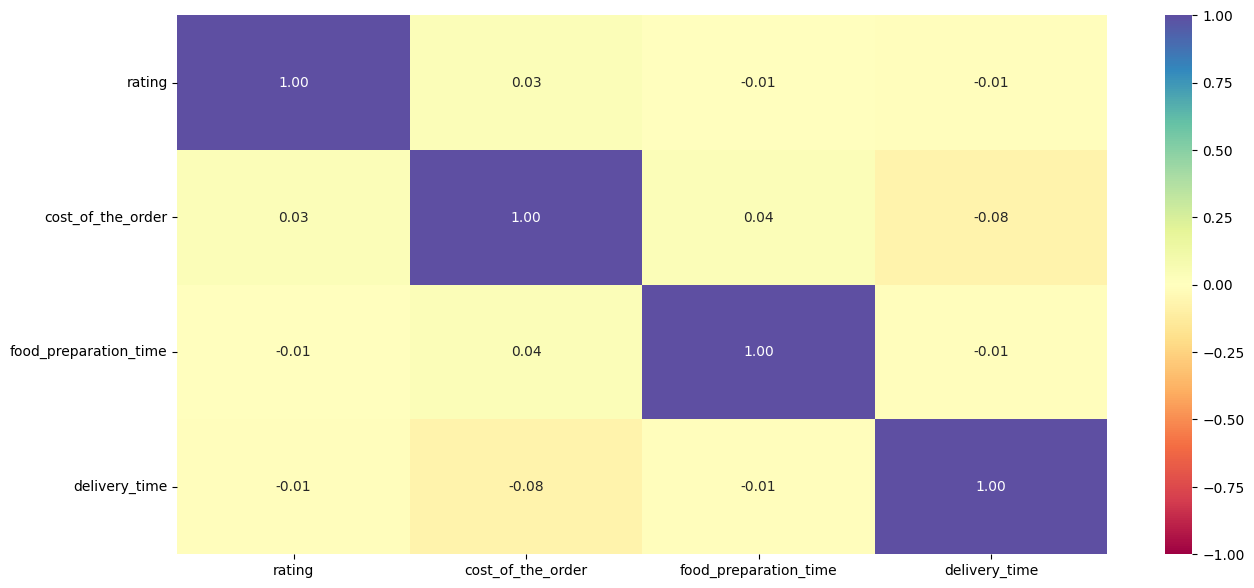

In [48]:
# Plot the heatmap (Optional)
col_list = ['rating', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(dfnew[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

In [18]:
# The conclusions and recommendations are presented all toghether under each other 

In [19]:
1- The best four cuisine_types are American, Japanese, Italian and Chinese
respectively.Also, American (1st ranked) cuisine type is the most popular 
one among other cuisines at the all days of the week/weekends and weekdays.
The company can contract with other companies to provide lunch on working 
days to sell more of these four restaurants and food.

2- Cost_of_the_order around 14.14 has a high frequency as median. Also,
50% of data (cost of the order) are between 12.08 and 22.2975. That is,
25th Percentile: 12.08, 75th Percentile: 22.2975. Moreovere 25% is between
4.47 and 12.08 and other 25% is between 22.2975 and 35.41. It means that
we have most sales for foods which have the cost between 12.08 and 22.2975
(50% of data) In order to sell more, the company can offer $14 proposed
packages in all restaurants for more profit because people tend to pay
around this amount for own costs and recreation. It is better for company
to focus more on 50% of data between 12.08 and 22.2975 and then other 
percentages of 25%. 

3- The most sales. orders, and revenue belongs to the weekend
(high volume of sale). Company can consider extra money for dasher
and worker for fast and more delivery in that time. Because many
costumer cancel the order because of the very busy zones. 
By increasing the worker and dasher with extra money company
can earn more profit.

4- In rating, we have many Not Given answers. Also, rating of 3 (9.9%),
rating of 4 (20.3%),  rating of 5 (31%),  rating of Not Given (38.8%).
Rating of 3 is worrying. So, company can do this by mandatory option.
Also, company must read the comment for finding the reason of rate of 3.
Also, rate of 4,5 are OK. Moreover, we have some problem in delivery
time instead of food prepration time for rating. company must push on
workers and dasher to fast delivery, although sometimes company 
assigns more thatn one order to a dahser or worker that affect on time.

5- In delivery time, we have a 25mins for food delivery as a median.
Also, 25th Percentile is 20.0, and 75th Percentile 28.0. It means 50%
of deliver times for orders are between 20mins and 28mins.
This error can come from map errors that can not able to optimize
the path and time. Because the driver can do a fast U-turn instead of
going long distance. Delivery time is high in weekends comparing to
weekdays due to high valume of orders.Company can solve this problem
by suggestion some gift and discount to costumers and dashers/workesr
to extend the time limitations for ordering time as well as speaking
with some high oedered restaurant for solving that. 

6- These restaurants “Shake Shack, The Meatball Shop, Blue Ribbon Sushi,
Blue Ribbon Fried Chicken, Parm” have a high range of orders respectively. 
The company can ask customers to slightly change the order time and give
a small discount in return to increase the demand to manage peak times. 

7- The range of orders (cost) has a direct relation positively with
the number of order as well as popularity of them like American, 
Japanese, Italian and Chinese cuisine types. There is no relation
between cost of order and rating. 

8- Food_prepration_time has no effect on number of order and popularity.

9- About rating, this factor has a multiple relations with other ones
like delivery time, food preparation delivery time, quality, ratio of
cost to quality and time. Sometime high delivery time and food
preparation delivery time destroy the tasting of the food like fried foods.

10- Some charges and incentives can help to more selling and more
profit for costumer and workers. The mean delivery time on weekdays
is around 28 minutes. The mean delivery time on weekends is around 22 minutes.

### Recommendations:

*  

---

In [ ]:
1- The best four cuisine_types are American, Japanese, Italian and Chinese
respectively.Also, American (1st ranked) cuisine type is the most popular 
one among other cuisines at the all days of the week/weekends and weekdays.
The company can contract with other companies to provide lunch on working 
days to sell more of these four restaurants and food.

2- Cost_of_the_order around 14.14 has a high frequency as median. Also,
50% of data (cost of the order) are between 12.08 and 22.2975. That is,
25th Percentile: 12.08, 75th Percentile: 22.2975. Moreovere 25% is between
4.47 and 12.08 and other 25% is between 22.2975 and 35.41. It means that
we have most sales for foods which have the cost between 12.08 and 22.2975
(50% of data) In order to sell more, the company can offer $14 proposed
packages in all restaurants for more profit because people tend to pay
around this amount for own costs and recreation. It is better for company
to focus more on 50% of data between 12.08 and 22.2975 and then other 
percentages of 25%. 

3- The most sales. orders, and revenue belongs to the weekend
(high volume of sale). Company can consider extra money for dasher
and worker for fast and more delivery in that time. Because many
costumer cancel the order because of the very busy zones. 
By increasing the worker and dasher with extra money company
can earn more profit.

4- In rating, we have many Not Given answers. Also, rating of 3 (9.9%),
rating of 4 (20.3%),  rating of 5 (31%),  rating of Not Given (38.8%).
Rating of 3 is worrying. So, company can do this by mandatory option.
Also, company must read the comment for finding the reason of rate of 3.
Also, rate of 4,5 are OK. Moreover, we have some problem in delivery
time instead of food prepration time for rating. company must push on
workers and dasher to fast delivery, although sometimes company 
assigns more thatn one order to a dahser or worker that affect on time.

5- In delivery time, we have a 25mins for food delivery as a median.
Also, 25th Percentile is 20.0, and 75th Percentile 28.0. It means 50%
of deliver times for orders are between 20mins and 28mins.
This error can come from map errors that can not able to optimize
the path and time. Because the driver can do a fast U-turn instead of
going long distance. Delivery time is high in weekends comparing to
weekdays due to high valume of orders.Company can solve this problem
by suggestion some gift and discount to costumers and dashers/workesr
to extend the time limitations for ordering time as well as speaking
with some high oedered restaurant for solving that. 

6- These restaurants “Shake Shack, The Meatball Shop, Blue Ribbon Sushi,
Blue Ribbon Fried Chicken, Parm” have a high range of orders respectively. 
The company can ask customers to slightly change the order time and give
a small discount in return to increase the demand to manage peak times. 

7- The range of orders (cost) has a direct relation positively with
the number of order as well as popularity of them like American, 
Japanese, Italian and Chinese cuisine types. There is no relation
between cost of order and rating. 

8- Food_prepration_time has no effect on number of order and popularity.

9- About rating, this factor has a multiple relations with other ones
like delivery time, food preparation delivery time, quality, ratio of
cost to quality and time. Sometime high delivery time and food
preparation delivery time destroy the tasting of the food like fried foods.

10- Some charges and incentives can help to more selling and more
profit for costumer and workers. The mean delivery time on weekdays
is around 28 minutes. The mean delivery time on weekends is around 22 minutes.